<a href="https://colab.research.google.com/github/JuanFelipePosada/python-basico_/blob/main/parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

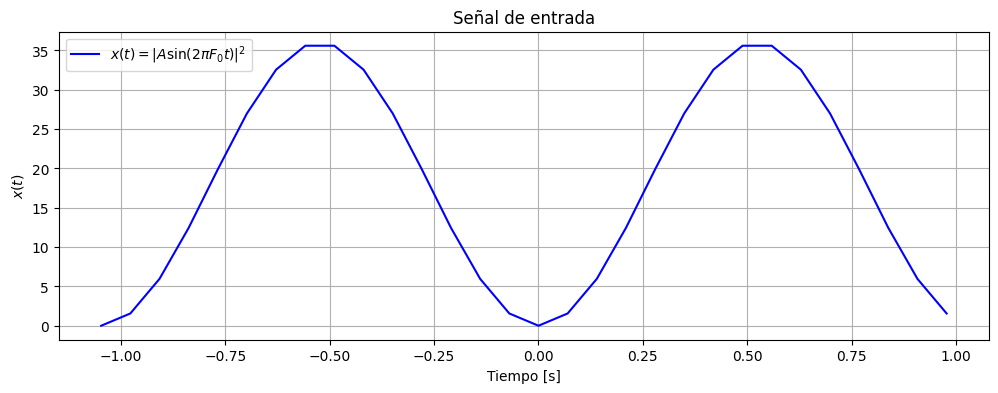

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 6  # Amplitud
Fo = 3 / (2 * np.pi)  # Frecuencia fundamental derivada del ejemplo
ti = -1 / (2 * Fo)  # Tiempo inicial definido por el intervalo
tf = 1 / (2 * Fo)   # Tiempo final definido por el intervalo
T = tf - ti  # Periodo
wo = 2 * np.pi / T  # Frecuencia angular
Fs = 30 * Fo  # Frecuencia de muestreo (debe cumplir con Nyquist)
tv = np.arange(ti, tf, 1 / Fs)  # Vector de tiempo
Nm = len(tv)  # Número de muestras en el tiempo

# Señal de entrada
xo = np.abs(A * np.sin(2 * np.pi * Fo * tv))**2

# Gráfica de la señal original
plt.figure(figsize=(12, 4))
plt.plot(tv, xo, label='$x(t) = |A \\sin(2\pi F_0 t)|^2$', color='b') # Corrected the label here
plt.xlabel('Tiempo [s]')
plt.ylabel('$x(t)$') # Corrected the label here
plt.title('Señal de entrada')
plt.grid(True)
plt.legend()
plt.show()


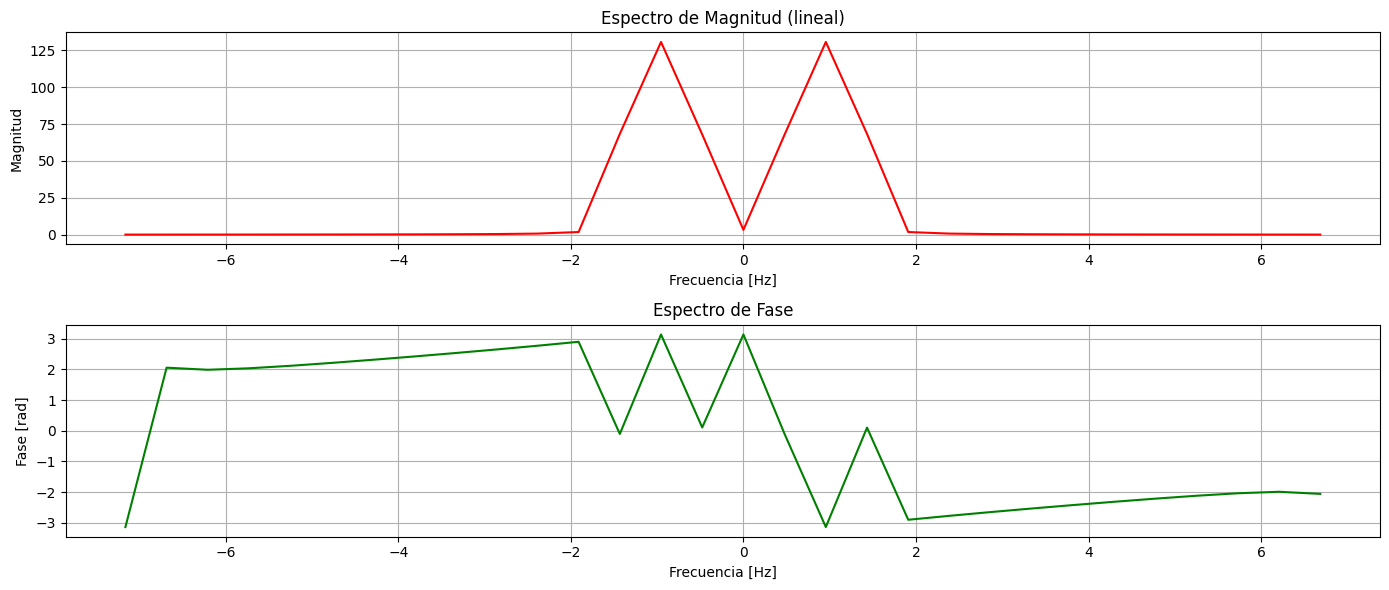

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 6
Fo = 3 / (2 * np.pi)
ti = -1 / (2 * Fo)
tf = 1 / (2 * Fo)
T = tf - ti
wo = 2 * np.pi / T
Fs = 30 * Fo
tv = np.arange(ti, tf, 1 / Fs)
Nm = len(tv)

# Señal de entrada
xo = np.abs(A * np.sin(2 * np.pi * Fo * tv))**2

# Aplicar ventana (opcional para reducir ruido)
window = np.hanning(Nm)
xo_centered = xo - np.mean(xo)  # Centrar la señal
Xf = np.fft.fftshift(np.fft.fft(xo_centered * window))
f = np.fft.fftshift(np.fft.fftfreq(Nm, 1 / Fs))

# Graficar magnitud sin decibeles para verificar
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(f, np.abs(Xf), color='r')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Espectro de Magnitud (lineal)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(f, np.angle(Xf), color='g')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.title('Espectro de Fase')
plt.grid(True)

plt.tight_layout()
plt.show()

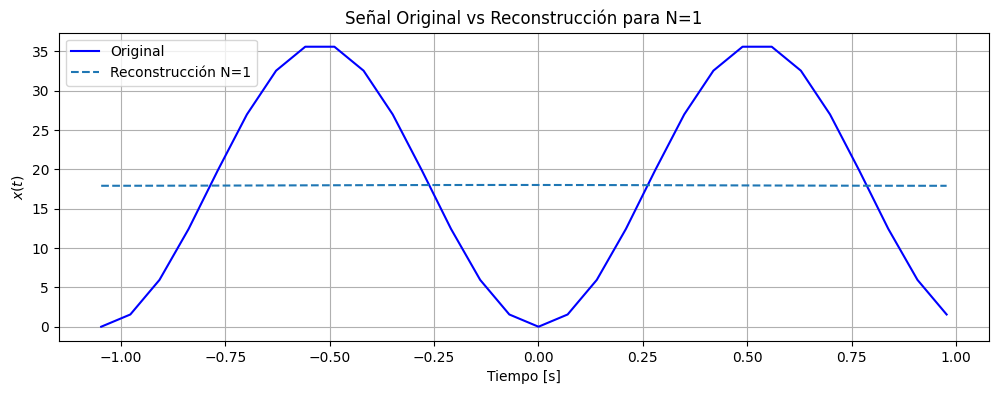

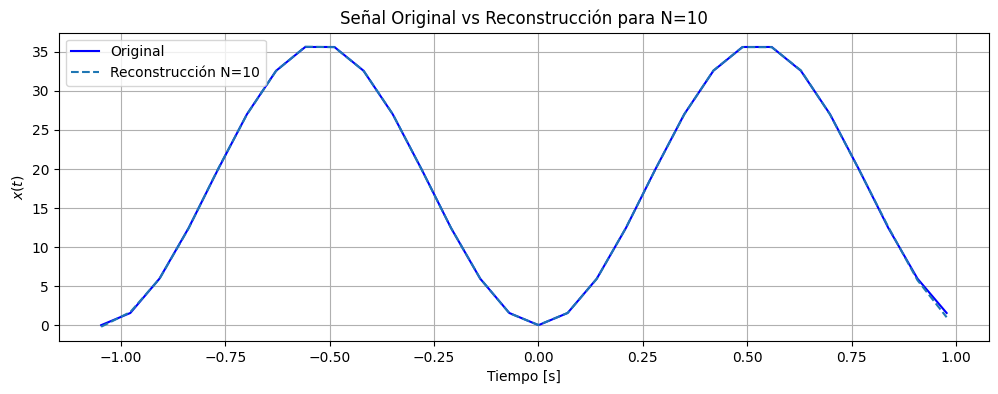

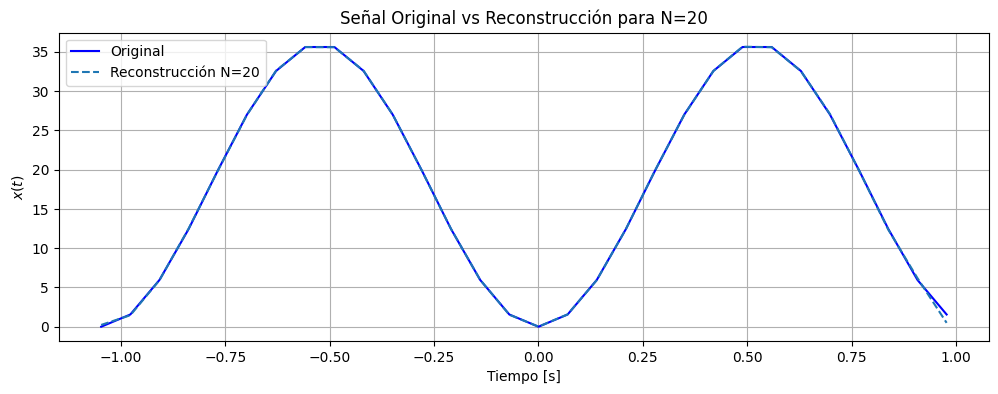

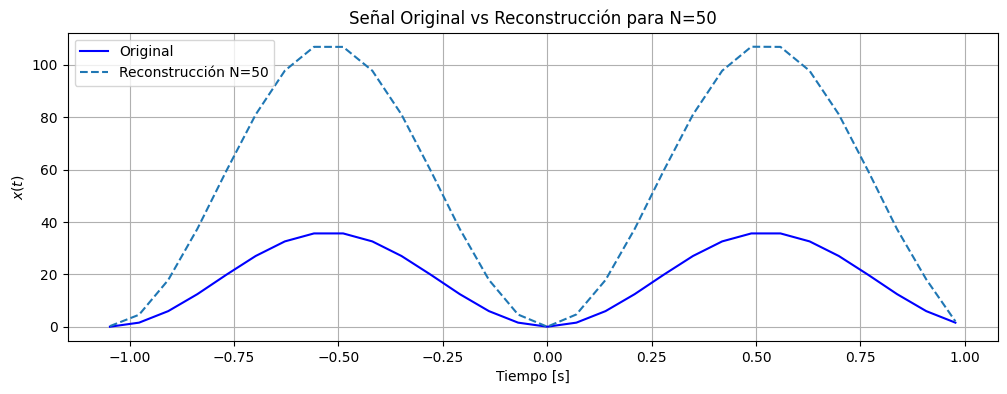

In [ ]:
# Reconstrucción de la señal usando la Serie de Fourier truncada
N_values = range(1, 51)  # Truncado hasta N = 50
errors = []  # Para almacenar el error relativo

for N in N_values:
    # Reconstrucción truncada con N términos
    x_recon = np.zeros_like(tv, dtype=np.complex128) # Initialize as complex array
    for n in range(-N, N + 1):
        cn = (1 / T) * np.trapz(xo * np.exp(-1j * n * wo * tv), tv)  # Coeficientes de Fourier
        x_recon += cn * np.exp(1j * n * wo * tv)  # Suma de términos de Fourier

    # Cálculo del error relativo
    error = np.linalg.norm(xo - x_recon.real) / np.linalg.norm(xo) # Use real part for error calculation
    errors.append(error)

    # Graficar la reconstrucción para algunos N específicos
    if N in [1, 10, 20, 50]:
        plt.figure(figsize=(12, 4))
        plt.plot(tv, xo, label='Original', color='b')
        plt.plot(tv, x_recon.real, label=f'Reconstrucción N={N}', linestyle='--')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('$x(t)$')
        plt.title(f'Señal Original vs Reconstrucción para N={N}')
        plt.grid(True)
        plt.legend()
        plt.show()

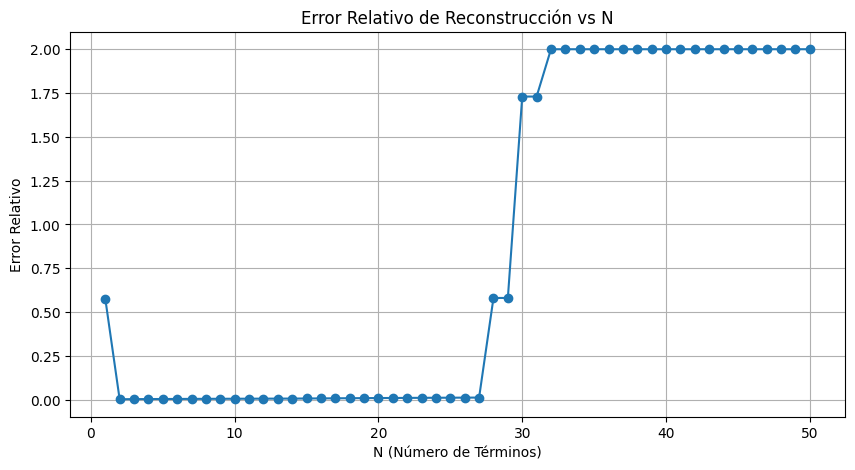

In [ ]:
# Gráfica del error relativo en función de N
plt.figure(figsize=(10, 5))
plt.plot(N_values, errors, marker='o')
plt.xlabel('N (Número de Términos)')
plt.ylabel('Error Relativo')
plt.title('Error Relativo de Reconstrucción vs N')
plt.grid(True)
plt.show()

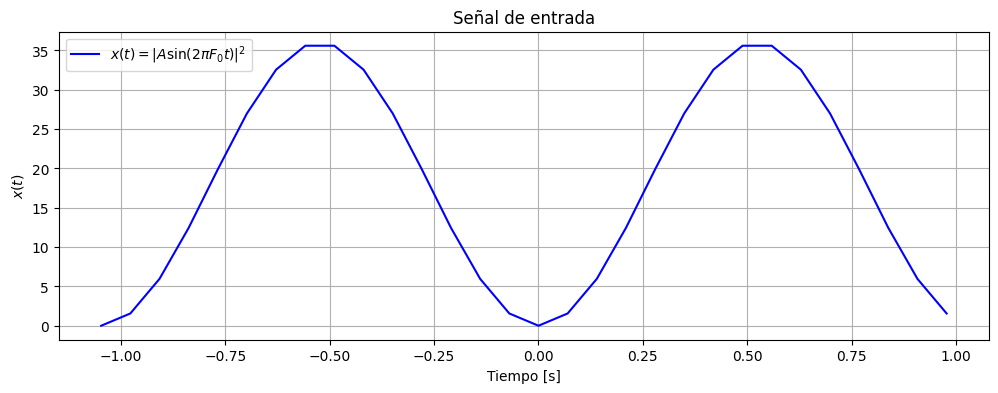

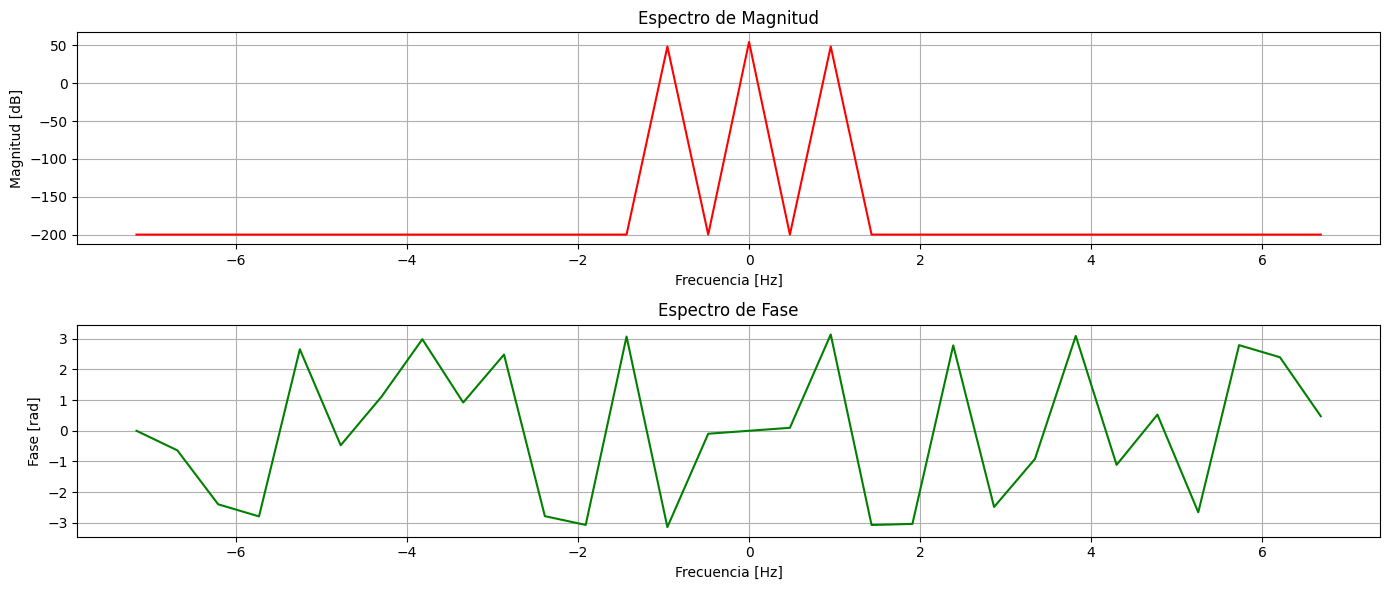

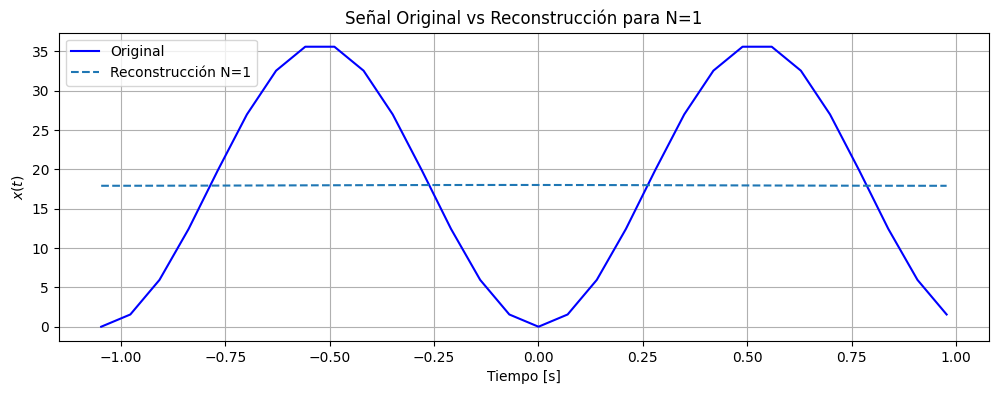

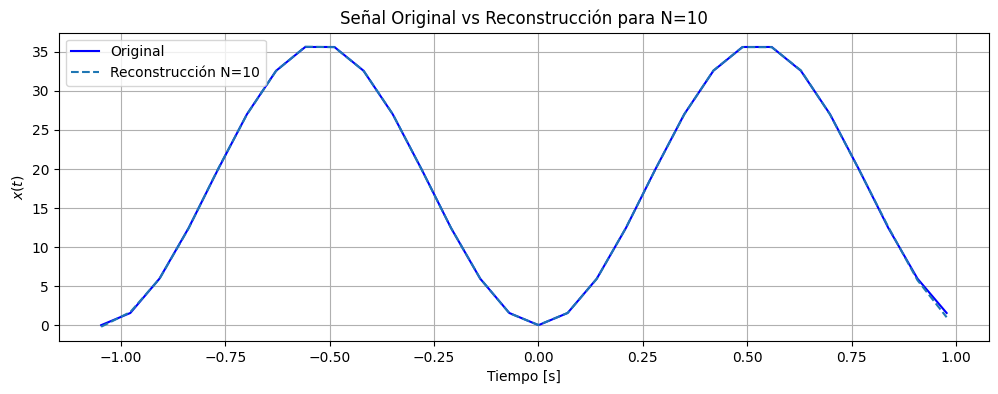

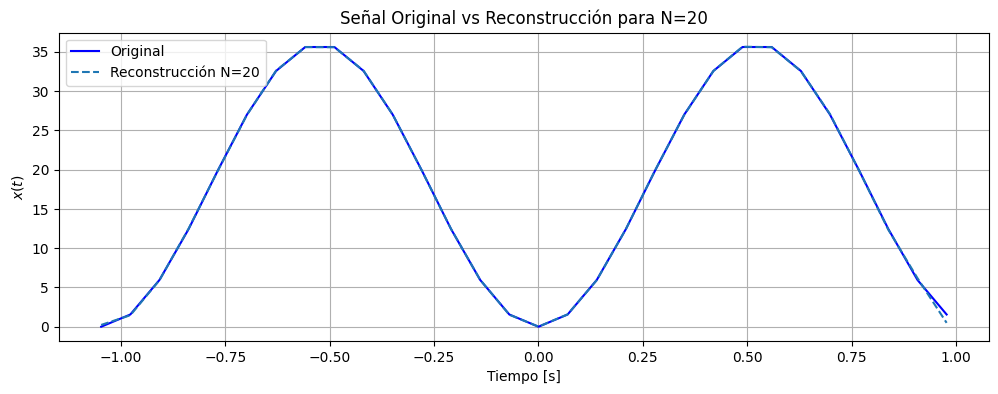

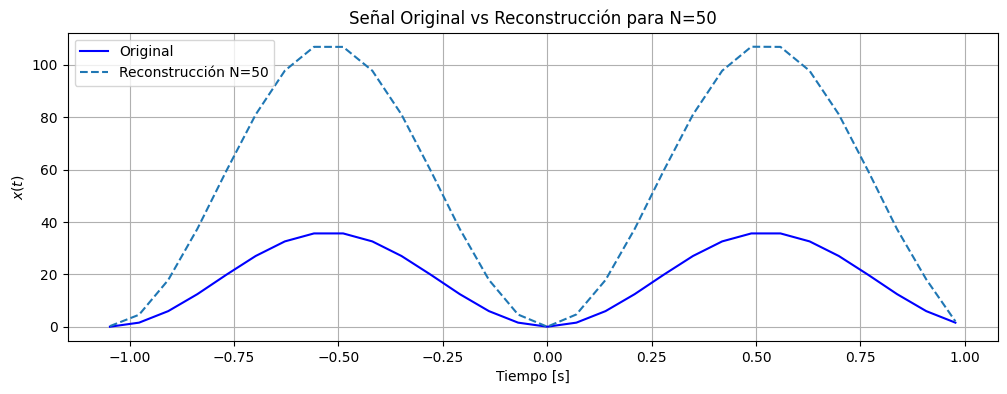

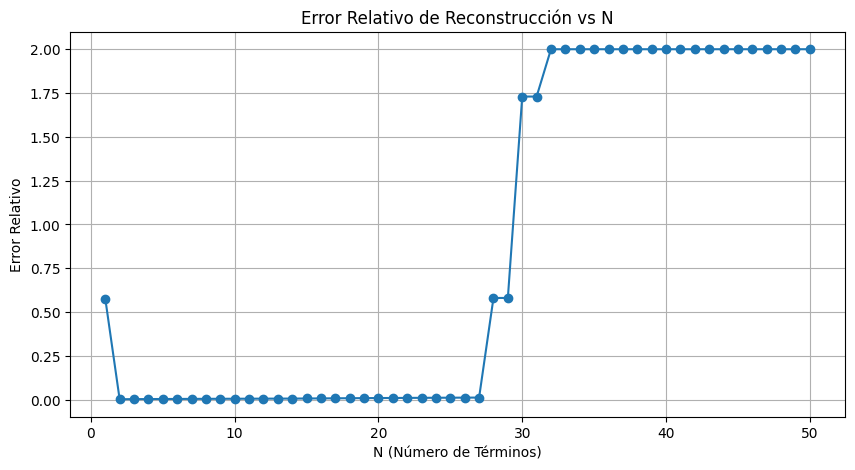

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 6  # Amplitud
Fo = 3 / (2 * np.pi)  # Frecuencia fundamental derivada del ejemplo
ti = -1 / (2 * Fo)  # Tiempo inicial definido por el intervalo
tf = 1 / (2 * Fo)   # Tiempo final definido por el intervalo
T = tf - ti  # Periodo
wo = 2 * np.pi / T  # Frecuencia angular
Fs = 30 * Fo  # Frecuencia de muestreo (debe cumplir con Nyquist)
tv = np.arange(ti, tf, 1 / Fs)  # Vector de tiempo
Nm = len(tv)  # Número de muestras en el tiempo

# Señal de entrada
xo = np.abs(A * np.sin(2 * np.pi * Fo * tv))**2

# Gráfica de la señal original
plt.figure(figsize=(12, 4))
plt.plot(tv, xo, label='$x(t) = |A \\sin(2\pi F_0 t)|^2$', color='b') # Corrected the label here
plt.xlabel('Tiempo [s]')
plt.ylabel('$x(t)$') # Corrected the label here
plt.title('Señal de entrada')
plt.grid(True)
plt.legend()
plt.show()##########
#############################################################################################################

# Cálculo de la Transformada de Fourier de la señal
Xf = np.fft.fftshift(np.fft.fft(xo))  # Transformada de Fourier centrada
f = np.fft.fftshift(np.fft.fftfreq(Nm, 1 / Fs))  # Frecuencias correspondientes

# Magnitud y fase de la Transformada de Fourier
magnitude = 20 * np.log10(np.abs(Xf) + 1e-10)  # Magnitud en dB
phase = np.angle(Xf)  # Fase en radianes

# Gráfica del espectro de Fourier (magnitud y fase)
plt.figure(figsize=(14, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(f, magnitude, color='r')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Espectro de Magnitud')
plt.grid(True)

# Fase
plt.subplot(2, 1, 2)
plt.plot(f, phase, color='g')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.title('Espectro de Fase')
plt.grid(True)

plt.tight_layout()
plt.show()
###########################################################################################################################################
# Reconstrucción de la señal usando la Serie de Fourier truncada
N_values = range(1, 51)  # Truncado hasta N = 50
errors = []  # Para almacenar el error relativo

for N in N_values:
    # Reconstrucción truncada con N términos
    x_recon = np.zeros_like(tv, dtype=np.complex128) # Initialize as complex array
    for n in range(-N, N + 1):
        cn = (1 / T) * np.trapz(xo * np.exp(-1j * n * wo * tv), tv)  # Coeficientes de Fourier
        x_recon += cn * np.exp(1j * n * wo * tv)  # Suma de términos de Fourier

    # Cálculo del error relativo
    error = np.linalg.norm(xo - x_recon.real) / np.linalg.norm(xo) # Use real part for error calculation
    errors.append(error)

    # Graficar la reconstrucción para algunos N específicos
    if N in [1, 10, 20, 50]:
        plt.figure(figsize=(12, 4))
        plt.plot(tv, xo, label='Original', color='b')
        plt.plot(tv, x_recon.real, label=f'Reconstrucción N={N}', linestyle='--')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('$x(t)$')
        plt.title(f'Señal Original vs Reconstrucción para N={N}')
        plt.grid(True)
        plt.legend()
        plt.show()

# Gráfica del error relativo en función de N
plt.figure(figsize=(10, 5))
plt.plot(N_values, errors, marker='o')
plt.xlabel('N (Número de Términos)')
plt.ylabel('Error Relativo')
plt.title('Error Relativo de Reconstrucción vs N')
plt.grid(True)
plt.show()
